In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
from pylab import rcParams

#Upload dos dados a partir da API da coingecko para um dataframe.
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1577836800&to=1609372800"
data = requests.get(url).json()
df = pd.DataFrame.from_dict(data)

def limpeza_dados_preco(prices, marketcaps, volumes):
    
    #Novas variáveis globais para limpeza dos dados
    global cleanprices, cleanmarketcap, cleanvolume, cleandate
    cleanprices = []
    cleanmarketcap = []
    cleanvolume = []
    cleandate = []
    
    #Loop de limpeza dos dados
    for i in range(len(prices)):
        price = prices[i]
        marketcap = marketcaps[i]
        volume = volumes[i]
        epoch_time = price [0]
        
        #Adicionar integers de preço, volume e marketcap sem integer de tempo epoch
        cleanmarketcap.append(marketcap[1])
        cleanvolume.append(volume[1])
        cleanprices.append(price[1])
        cleandate.append(epoch_time/1000)
        
limpeza_dados_preco(df["prices"], df["market_caps"], df["total_volumes"])

#Criação de Dataframe
btcusd = {"Data":cleandate, 
          "BTCUSD":cleanprices, 
          "MarketCap":cleanmarketcap, 
          "Volume":cleanvolume}

#Criação dataframe limpa.
df_btc_prices = pd.DataFrame(data=btcusd)

#Começar index com 1 indicando o dia
df_btc_prices.index += 1

#Converter tempo epoch em tempo ISO 8601
df_btc_prices["Data"] = pd.to_datetime(df_btc_prices["Data"], unit="s")
df_btc_prices

,Data,BTCUSD,MarketCap,Volume
1,2020-01-01,7195.153895,1.303941e+11,2.118788e+10
2,2020-01-02,7193.754668,1.304230e+11,1.812352e+10
3,2020-01-03,6963.853354,1.262808e+11,2.031319e+10
4,2020-01-04,7300.346935,1.327663e+11,3.101578e+10
5,2020-01-05,7351.377053,1.334747e+11,2.061164e+10
...,...,...,...,...
362,2020-12-27,26476.130137,4.919786e+11,4.199515e+10
363,2020-12-28,26423.228792,4.934275e+11,5.665498e+10
364,2020-12-29,27125.384121,5.037122e+11,4.218652e+10
365,2020-12-30,27424.538955,5.096803e+11,3.808184e+10


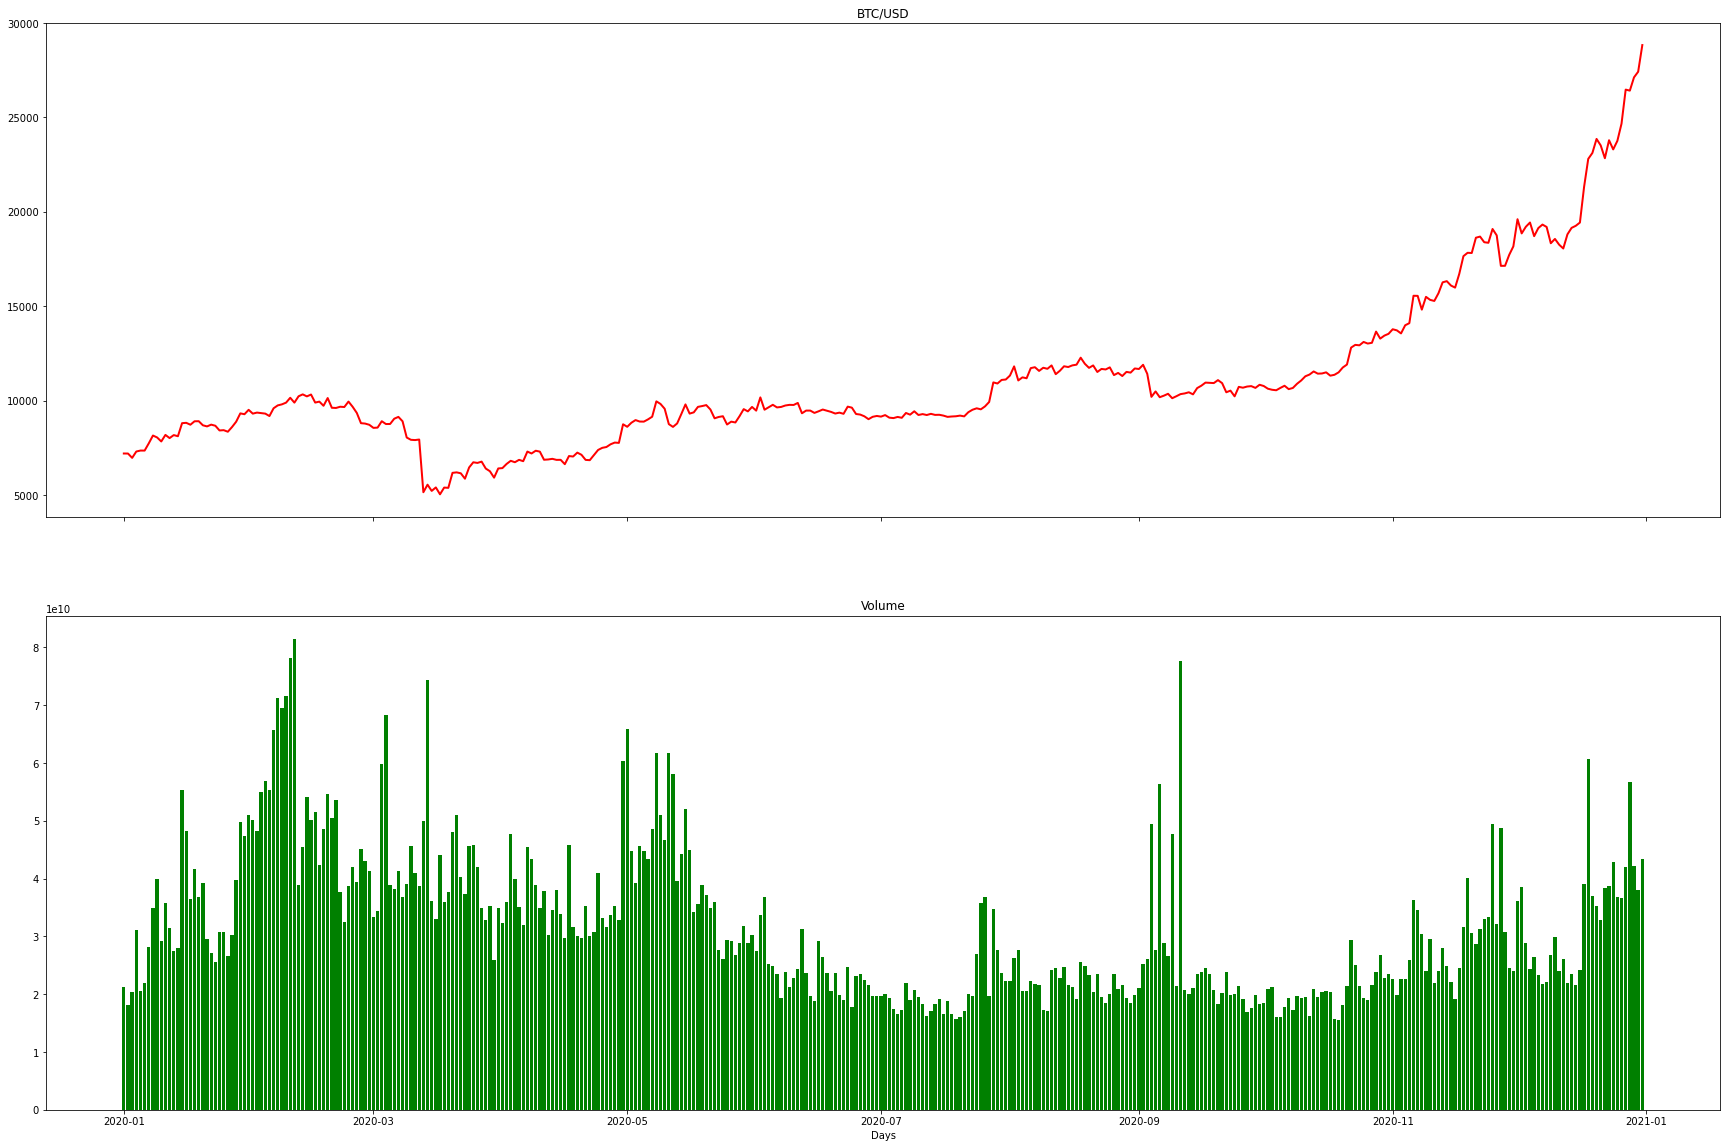

In [3]:
f, axarr = plt.subplots(2, sharex=True)

axarr[0].set_title("BTC/USD")
axarr[0].plot(df_btc_prices["Data"], 
              df_btc_prices["BTCUSD"], 
              label = "BTC/USD", 
              linewidth = "2",
              color = "r")

axarr[1].set_title("Volume")
axarr[1].bar(df_btc_prices["Data"], 
             df_btc_prices["Volume"], 
             color = "g",
             label = "MarketCap")

rcParams['figure.figsize'] = 30, 20
plt.xlabel("Days")
plt.show()